In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max
from PIL import Image

from skimage.morphology import skeletonize, thin
from skimage.util import invert
from skimage import measure
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk
from skimage import feature
from skimage.filters import roberts, sobel, scharr, prewitt
import seaborn as sns
sns.reset_orig()

from skimage import restoration

from skimage import exposure
from skimage.filters import gaussian

from scipy import ndimage

from time import time

from skimage.color import rgb2gray
from scipy import ndimage as ndi

from skimage.filters.rank import entropy
import scipy


import networkx as nx
from scipy import interpolate

from skimage.segmentation import random_walker
from skimage.data import binary_blobs
from skimage.exposure import rescale_intensity
import glob

from skimage.morphology import disk
from skimage import io

/Users/spencerlab/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/spencerlab/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [10]:
import cv2

In [11]:
im=io.imread("Stitch_9_G001.tif")

In [12]:
im.shape

(274, 2752, 3968, 3)

In [13]:
def remove_specs(array, size):
    arr=measure.label(array, 8).astype('uint8')
    unk = np.unique(arr)
    mask = np.zeros(array.shape)
    
    for i in range(1, len(unk)):
        cluster = (arr==i)
        clt_pts = np.where(cluster==True)
        
        if len( np.asarray(clt_pts)[0] ) > size:
            mask=mask+cluster
        
        

    return mask

In [15]:
#for stacks in im:

stacks = 0
while True:
    #n= cv2.GaussianBlur(im[stacks],(1,1),0)
    n = im[stacks]
    hsvs= cv2.cvtColor(n,cv2.COLOR_BGR2HSV)
    #60, 100, 50
    low_green = np.array([50,47,60])
    #100
    high_green = np.array([97,255,255])
    #100 225 225
    green_mask = cv2.inRange(hsvs,low_green,high_green)
    x = Image.fromarray(green_mask)

    #x.save("D:/megaimage/b"+str(stacks)+".tif")

    #green = cv2.bitwise_and(hsvs,hsvs,mask= green_mask)
    #grey = cv2.cvtColor(green, cv2.COLOR_BGR2GRAY)
    

    #retval2,th = cv2.threshold(grey,200,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    #c = im[stacks]

    c= green_mask.astype(np.bool)
    
    the, c = cv2.threshold(np.float32(c), 1, 255, cv2.THRESH_BINARY)
    
    #c = remove_specs(c,3)

    a = Image.fromarray(c)
    


    #new code
    #im1 = cv2.imread("D:/megaimage/"+str(stacks)+".tif")
    #im2 = cv2.imread("D:/megaimage/t"+str(stacks)+".tif")
    #a = cv2.hconcat([im2, im1])
    #cv2.imwrite("D:/megaimage/Z"+str(stacks)+".tif", a)
    
    
    a.save('ab/'+str(stacks)+".tif")
    stacks+=1
    print(stacks)
    if stacks>260:
        break
        # transperancy lower and then overlay images
        #superimpose images

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261


In [ ]:
import glob
from skimage.external import tifffile
with tifffile.TiffWriter('Stack5.tif') as stack:
       i = 0
       for filename in glob.glob('ab/*.tif'):
            filename= 'ab/'+str(i)+'.tif'
            print(filename)
            i+=1
            stack.save(tifffile.imread(filename))

In [81]:
bim = io.imread("Stack4.tif")



In [85]:
np.unique(measure.label(bim[31]) )

array([    0,     1,     2, ..., 78553, 78554, 78555])

In [101]:
distance = ndi.distance_transform_edt(bim[31])

In [105]:
img_rescale = 255*distance/np.unique(distance)[-1]

In [115]:
img_rescale_2 = img_rescale*(img_rescale>np.unique(img_rescale)[1] )

In [116]:
img_tc = img_rescale_2.astype('uint8')

In [118]:
np.unique(img_rescale)

array([  0.        ,  61.84658438,  87.46427842, 123.69316877,
       138.29316686, 174.92855685, 185.53975315, 195.57607216,
       222.99103121, 247.38633754, 255.        ])

In [117]:
Image.fromarray(img_tc).save('thresh3.tif')

In [114]:
len(np.unique(img_tc))

11

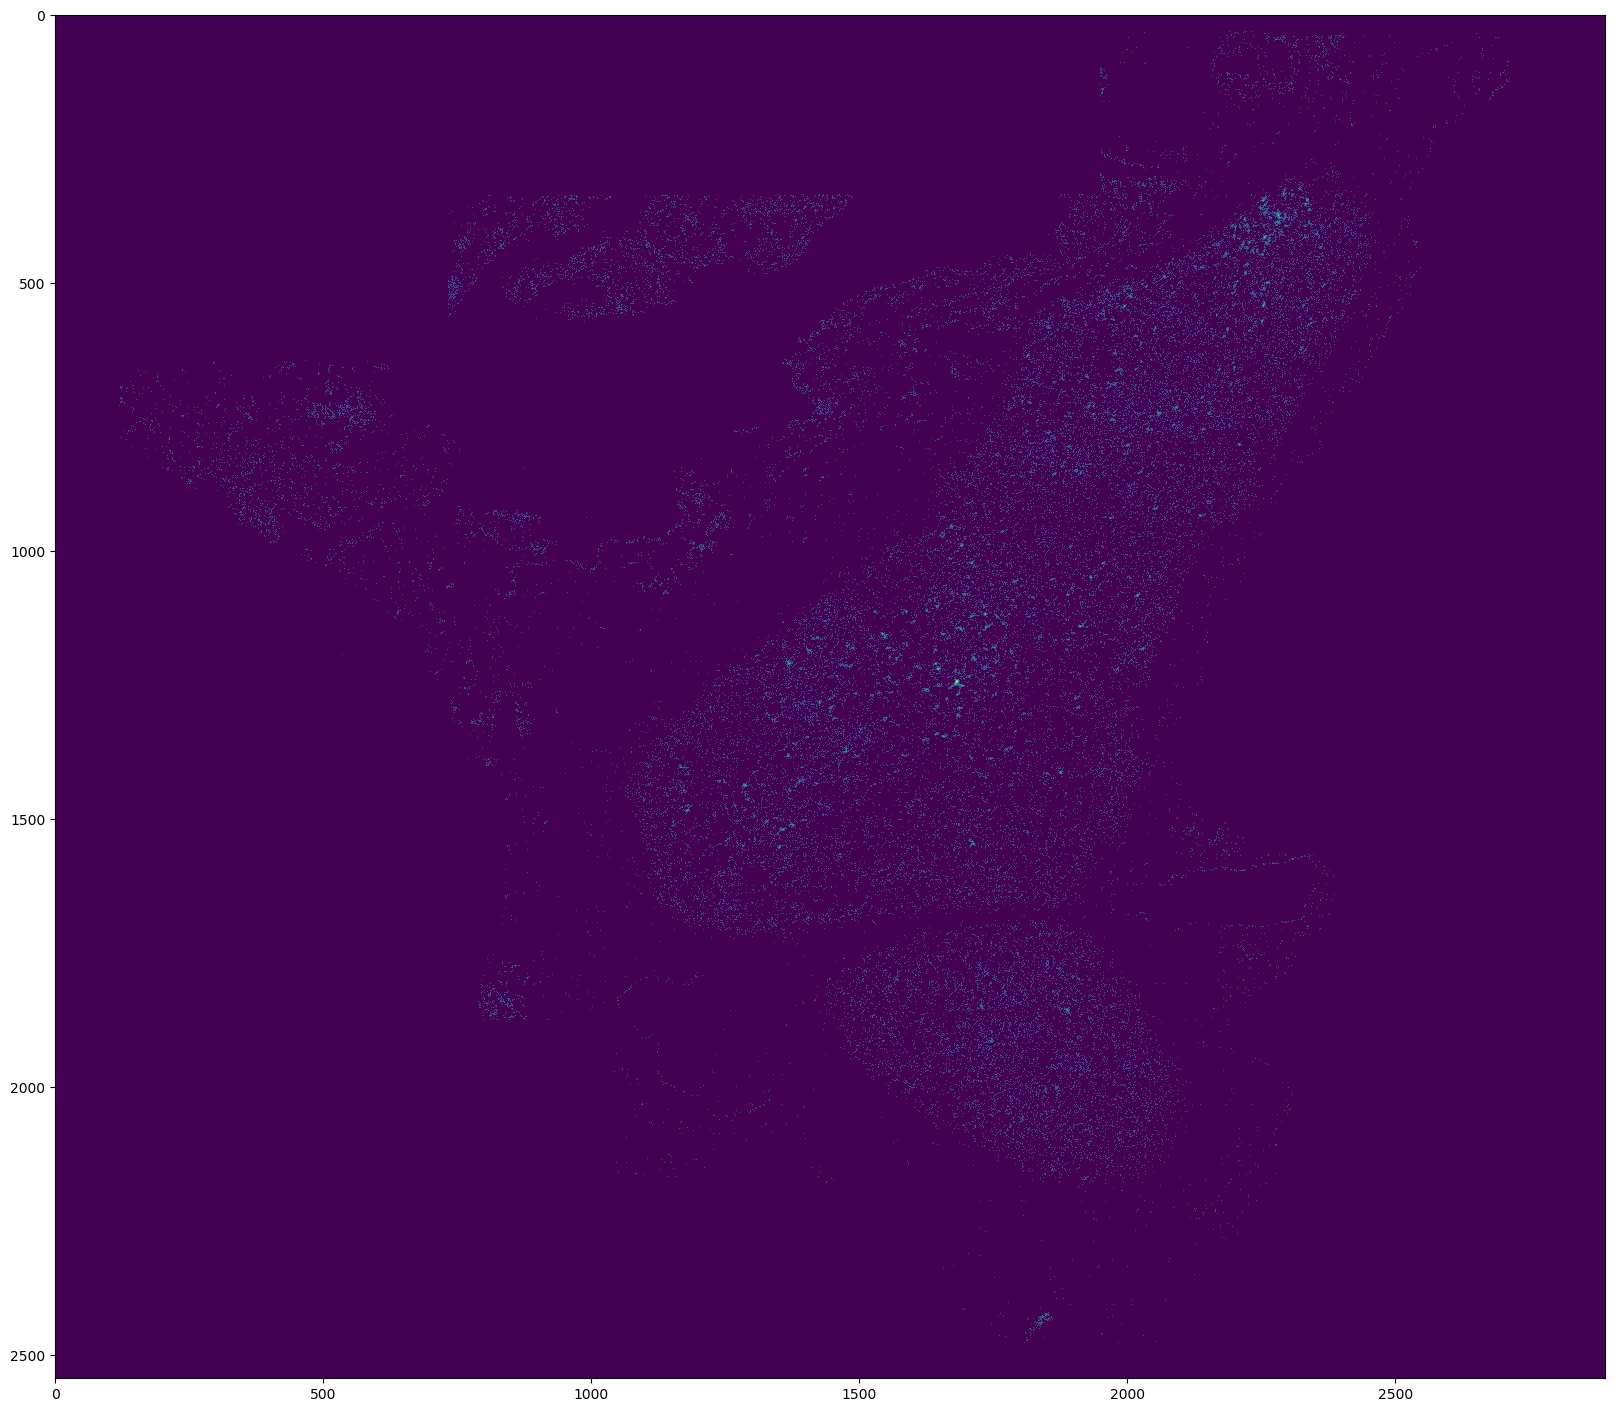

In [106]:
plt.figure(figsize=(20,20))
plt.imshow(img_rescale)

In [56]:
bim.shape

(261, 2544, 2892)

In [57]:
bim2 = bim.copy()

bim2=(255*(bim>0)).astype('uint8')

In [50]:
from skimage.external import tifffile


In [60]:
tifffile.imsave("Stacknx2.tif", bim2)


In [34]:
bim.shape

(261, 2544, 2892)

In [45]:
im50 = measure.label(bim[2,:,:], 8)
len(np.unique(im50))

269

In [46]:
len(np.unique(img))

10533

In [ ]:
stack=30
while True:
clt_pts = np.where(cluster==True)
